#Mount the drive click on third symbol

In [1]:
cd /content/drive/MyDrive/IBMDay4cnn/

/content/drive/MyDrive/IBMDay4cnn


In [ ]:
!unzip Fertilizers_RS_For_Disease_Prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d99dae-78a8-46f4-b7ad-600e0685d592___GCREC_Bact.Sp 6136.JPG  
  

In [2]:
pwd

'/content/drive/MyDrive/IBMDay4cnn'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=False) #
test_datagen=ImageDataGenerator(rescale=1./255) #

In [5]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set', target_size=(128,128), class_mode='categorical', 
                                          batch_size=24)

Found 11386 images belonging to 9 classes.


In [6]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set', target_size=(128,128), class_mode='categorical', 
                                          batch_size=24)

Found 3416 images belonging to 9 classes.


In [7]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [8]:
x_train

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPool2D, Flatten

In [10]:
model=Sequential()
model.add(Convolution2D(64,(3,3), input_shape=(128,128,3),activation='relu'))


In [11]:
model.add(MaxPool2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

Hidden Layers

In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layer

In [14]:
model.add(Dense(9,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 300)               76205100  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 9)                 1359      
                                                        

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
len(x_train)/24

19.791666666666668

In [21]:
len(x_test)/24

5.958333333333333

In [17]:
model.fit(x_train,steps_per_epoch=20,validation_data=x_test,validation_steps=6,epochs=10)

Epoch 1/10
20/20 [==============================] - 427s 21s/step - loss: 7.0261 - accuracy: 0.1667 - val_loss: 2.1071 - val_accuracy: 0.1806
Epoch 2/10
20/20 [==============================] - 403s 20s/step - loss: 2.0645 - accuracy: 0.2542 - val_loss: 1.9681 - val_accuracy: 0.3958
Epoch 3/10
20/20 [==============================] - 387s 20s/step - loss: 1.5656 - accuracy: 0.4437 - val_loss: 1.3674 - val_accuracy: 0.5208
Epoch 4/10
20/20 [==============================] - 374s 19s/step - loss: 1.4584 - accuracy: 0.4979 - val_loss: 1.4775 - val_accuracy: 0.4792
Epoch 5/10
20/20 [==============================] - 360s 18s/step - loss: 1.3061 - accuracy: 0.5500 - val_loss: 1.1148 - val_accuracy: 0.6389
Epoch 6/10
20/20 [==============================] - 346s 18s/step - loss: 1.0524 - accuracy: 0.6333 - val_loss: 0.9371 - val_accuracy: 0.6458
Epoch 7/10
20/20 [==============================] - 332s 17s/step - loss: 0.9948 - accuracy: 0.6479 - val_loss: 0.7854 - val_accuracy: 0.7431
Epoch 

In [18]:
model.save('Veg_pathon.h5')

In [19]:
ls

 dataset/                  fruit_pathon.h5        Veg_pathon.h5
'Dataset Plant Disease'/   Veg_pathon_128_64.h5


Test the model

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('Veg_pathon.h5')

In [22]:
img=image.load_img('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.JPG')

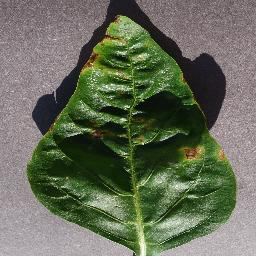

In [23]:
img

In [24]:
img=image.load_img('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.JPG',target_size=(128,128))

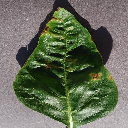

In [25]:
img


In [26]:
x=image.img_to_array(img)
x

array([[[114., 102., 106.],
        [124., 112., 116.],
        [140., 128., 132.],
        ...,
        [114., 102., 104.],
        [129., 117., 119.],
        [136., 124., 126.]],

       [[117., 105., 109.],
        [ 93.,  81.,  85.],
        [118., 106., 110.],
        ...,
        [ 93.,  81.,  83.],
        [135., 123., 125.],
        [109.,  97.,  99.]],

       [[123., 111., 115.],
        [125., 113., 117.],
        [100.,  88.,  92.],
        ...,
        [130., 118., 120.],
        [128., 116., 118.],
        [106.,  94.,  96.]],

       ...,

       [[178., 172., 176.],
        [171., 165., 169.],
        [172., 166., 170.],
        ...,
        [205., 199., 201.],
        [183., 177., 179.],
        [194., 188., 190.]],

       [[194., 188., 192.],
        [182., 176., 180.],
        [185., 179., 183.],
        ...,
        [194., 188., 190.],
        [180., 174., 176.],
        [190., 184., 186.]],

       [[189., 183., 187.],
        [180., 174., 178.],
        [176., 1

In [ ]:
x.ndim

3

In [ ]:
x.shape

(64, 64, 3)

In [27]:
x=np.expand_dims(x,axis=0)
x

array([[[[114., 102., 106.],
         [124., 112., 116.],
         [140., 128., 132.],
         ...,
         [114., 102., 104.],
         [129., 117., 119.],
         [136., 124., 126.]],

        [[117., 105., 109.],
         [ 93.,  81.,  85.],
         [118., 106., 110.],
         ...,
         [ 93.,  81.,  83.],
         [135., 123., 125.],
         [109.,  97.,  99.]],

        [[123., 111., 115.],
         [125., 113., 117.],
         [100.,  88.,  92.],
         ...,
         [130., 118., 120.],
         [128., 116., 118.],
         [106.,  94.,  96.]],

        ...,

        [[178., 172., 176.],
         [171., 165., 169.],
         [172., 166., 170.],
         ...,
         [205., 199., 201.],
         [183., 177., 179.],
         [194., 188., 190.]],

        [[194., 188., 192.],
         [182., 176., 180.],
         [185., 179., 183.],
         ...,
         [194., 188., 190.],
         [180., 174., 176.],
         [190., 184., 186.]],

        [[189., 183., 187.],
       

In [30]:
y=np.argmax(model.predict(x),axis=1)
y

array([0])

In [28]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [31]:
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

'Pepper_BS'

In [32]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/bb3d6df0-683e-4f04-afaf-277a36edad6c___RS_Early.B 9070.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[2]


'Potato_EB'

In [33]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Bacterial_spot/b179b3d0-80cf-4dbf-9e88-b3e9b4a93b3b___GCREC_Bact.Sp 3659.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'

In [34]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Late_blight/b19055d9-6a5d-4b73-90a5-3b3685ac344a___GHLB2 Leaf 8729.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'

In [36]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Leaf_Mold/ae1a8d9f-85a8-4d62-9700-b31bf1dd7a78___Crnl_L.Mold 8659.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'

In [37]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/c363173e-e72f-4aeb-937b-29f60598736d___JR_Sept.L.S 8563.JPG",target_size=(128,128))
img.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper_BS','Pepper_H','Potato_EB','Potato_LB','Potato_H','Tomato_BS','Tomato_blight','Tomato_mold','Tomato_H']
index[y[0]]

[8]


'Tomato_H'